In [1]:
import pandas as pd
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

🟨 Median Yearly Salary vs. Job Count (2.15.1) - Problem
Matplotlib Scatter Plots
Problem Statement:

    Create a scatter plot to compare the median yearly salary and the number of jobs based on the job_title_short column.
    To create the scatter plot first create a new DataFrame using the groupby() method to aggregate and find the median salary and job count for each job title.
    Annotate each point with the job title name.

Hint:

Use the .plot() method of the grouped DataFrame to create the scatter plot and plt.text() for labeling each point.

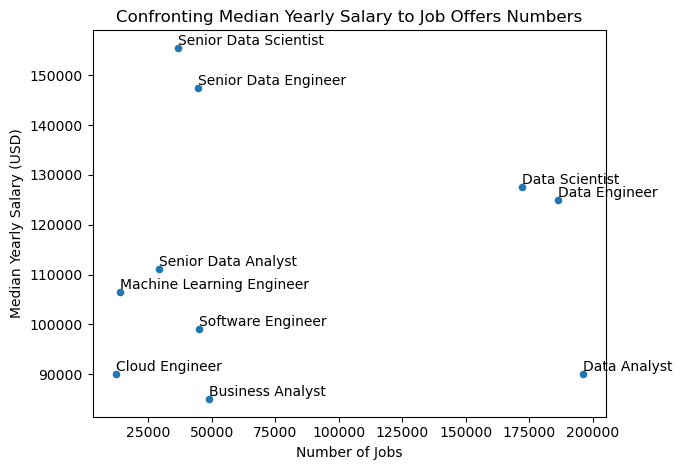

In [34]:
df_grouped = df.groupby('job_title_short').agg(
    median_salary = ('salary_year_avg','median'),
    job_count = ('job_title_short','count')
)

df_grouped.sort_values(by='job_count', ascending=False, inplace=True)


df_grouped.plot(kind='scatter', x='job_count', y='median_salary')
plt.title('Confronting Median Yearly Salary to Job Offers Numbers')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.tight_layout()

for i, txt in enumerate(df_grouped.index):
    plt.text(df_grouped['job_count'].iloc[i],df_grouped['median_salary'].iloc[i], txt,ha='left', va='bottom')

plt.show()


🟨 Top 7 Countries by Median Yearly Salary vs Job Count (2.15.2) - Problem
Matplotlib Scatter Plots
Problem Statement:

Create a scatter plot to visualize the relationship between the number of job postings and median yearly salary for the top 7 countries based on highest number of job postings. Annotate each point with the country's name.
Hint:

Use the .plot() method of the grouped DataFrame to create the scatter plot, and the plt.text() function to add annotations for each data point.

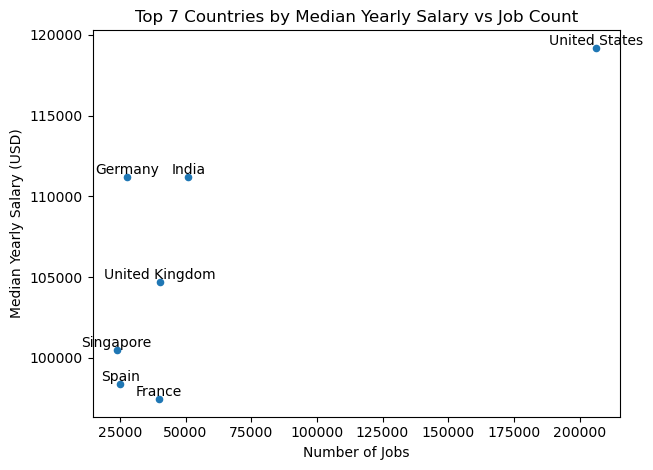

In [62]:
df_grouped=df.groupby('job_country').agg(
    jobs_count = ('job_country', 'count'),
    median_salary = ('salary_year_avg', 'median')
)
df_countries = df_grouped.sort_values('jobs_count', ascending=False).head(7)

df_countries.plot(kind='scatter', x='jobs_count', y='median_salary')
plt.title('Top 7 Countries by Median Yearly Salary vs Job Count')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.tight_layout()

for i, txt in enumerate(df_countries.index):
    plt.text(df_countries['jobs_count'].iloc[i],df_countries['median_salary'].iloc[i],txt, ha='center',va='bottom')

plt.show()

🟥 Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3) - Problem
Matplotlib Scatter Plots
Problem Statement:

    Create a scatter plot to visualize the relationship between the average yearly salary and the job count filtering a DataFrame for:
        Data Analyst, Data Scientist, and Data Engineer positions in job_title_short
        United States for the job_country
        'Full-time' and 'Contractor' for the job_schedule_type
        Remove roles that do not have any yearly salary data.
    Combine the job_title_short and job_schedule_type into one column (called job_title_type) in the newly created DataFrame to use as the labels for the plot.
    For the plot use a for loop to cycle through the unique values in job_title_type and plot using the plt.scatter() function, specifying the label of job_title_type.
    Ensure the legend is appearing.
    Label the plot's axis and title appropriately.

Code Needed:

target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

Hint:

Use the plt.scatter() function to generate the scatter plot, employing the label parameter to differentiate between the different job titles and job types.

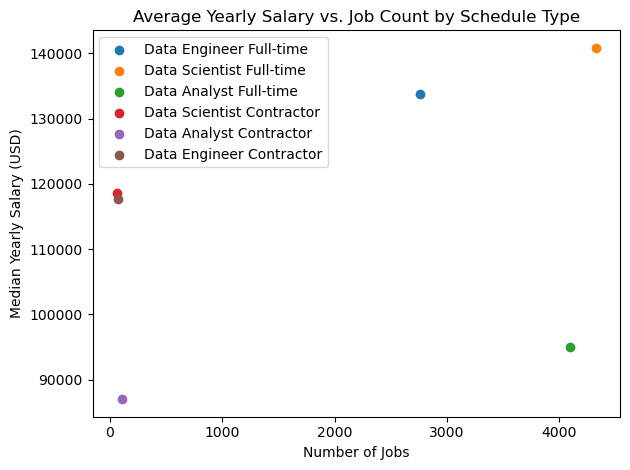

In [99]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_filtered = (
    df[
        (df['job_title_short'].isin(target_job_titles)) &
        (df['job_country']=='United States') &
        (df['job_schedule_type'].isin(['Full-time','Contractor']))
       ]
).dropna(subset='salary_year_avg')
df_new= df_filtered.copy()
df_new['job_title_type']=df_new['job_title_short'] + " " + df_new['job_schedule_type']
df_new.drop(['job_schedule_type', 'job_title_short'],axis=1, inplace=True)
df_new

for job in df_new['job_title_type'].unique():
    df_job = df_new[df_new['job_title_type']==job]
    x=len(df_job)
    y=df_job['salary_year_avg'].mean()
    plt.scatter(x=x,y=y, label=job)
   #plt.text(x,y,job,ha='left',va='bottom')

plt.title('Average Yearly Salary vs. Job Count by Schedule Type')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.legend()
plt.tight_layout()
plt.show()